In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

## HW4 3a

In [8]:
# read sst data
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'era5_sst_1980-2009.nc'
data = xr.open_mfdataset(datafile).compute()
data = data.sea_surface_temperature
data

<xarray.DataArray 'sea_surface_temperature' (time: 10958, latitude: 91,
                                             longitude: 180)> Size: 718MB
array([[[271.45953, 271.45953, 271.45953, ..., 271.45953, 271.45953,
         271.45953],
        [271.45953, 271.45953, 271.45953, ..., 271.45953, 271.45953,
         271.45953],
        [271.45953, 271.45953, 271.45953, ..., 271.45953, 271.45953,
         271.45953],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[271.4604 , 271.4604 , 271.4604 , ..., 271.4604 , 271.4604 ,
         271.4604 ],
        [271.4604 , 271.4604 , 271.4604 , ..., 271.4604 , 271.4604 ,
         271.4604 ],
        [271.4604 , 271.4604 , 271.4604 , ..., 271.4604 , 271.4604 ,
         271.4604 ],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[271.46024, 271.46024, 271.46024, ..., 271.46024, 271.46024,
         271.46024],
        [271.46024, 271.46024, 271.46024, ..., 271.46024, 271.46024,
         271.46024],
        [271.46024, 271.46024, 271.46024, ..., 271.46024, 271.46024,
         271.46024],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 364B 90.0 88.0 86.0 84.0 ... -86.0 -88.0 -90.0
  * longitude  (longitude) float32 720B 0.0 2.0 4.0 6.0 ... 354.0 356.0 358.0
  * time       (time) datetime64[ns] 88kB 1980-01-01 1980-01-02 ... 2009-12-31
Attributes:
    long_name:   Sea surface temperature
    short_name:  sst
    units:       K

In [9]:
data = data.sel(latitude=slice(5,-5),longitude=slice(-170+360,-120+360))
nino34 = data.mean(dim='latitude').mean(dim='longitude')
nino34

<xarray.DataArray 'sea_surface_temperature' (time: 10958)> Size: 44kB
array([299.6973 , 299.6741 , 299.71252, ..., 301.36917, 301.27567,
       301.24286], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 88kB 1980-01-01 1980-01-02 ... 2009-12-31

In [10]:
nino34_mon = nino34.resample(time='1ME').mean()
nino34_mon

<xarray.DataArray 'sea_surface_temperature' (time: 360)> Size: 1kB
array([300.19922, 300.13666, 300.43704, 301.0648 , 300.98276, 300.7769 ,
       299.96048, 299.4301 , 299.61832, 299.43268, 299.49338, 299.30148,
       298.54523, 298.58212, 299.43442, 300.02228, 300.31848, 300.11627,
       299.94727, 299.365  , 299.35785, 299.2916 , 299.35385, 299.38513,
       299.42902, 299.66934, 300.40137, 301.47836, 301.75287, 301.75677,
       301.21356, 301.171  , 301.44882, 301.92276, 302.33197, 302.41913,
       302.37357, 301.9396 , 301.9947 , 301.96045, 301.8411 , 301.3368 ,
       300.16986, 299.525  , 299.36905, 298.9775 , 298.7195 , 298.64987,
       298.95905, 299.23938, 299.66687, 300.4075 , 300.4833 , 299.75717,
       299.71484, 299.51157, 299.53976, 298.96036, 298.50665, 298.3971 ,
       298.5781 , 298.96426, 299.53577, 299.99985, 300.2152 , 300.14362,
       299.73615, 299.58627, 299.26038, 299.37103, 299.34027, 299.18466,
       298.778  , 299.0233 , 299.70694, 300.48276, 300.586  , 300.72815,
       300.3811 , 300.4381 , 300.42953, 300.7464 , 300.9103 , 300.97247,
       301.05548, 300.88345, 301.51926, 301.7299 , 301.83597, 302.05954,
       301.82474, 301.74084, 301.396  , 301.15204, 300.9927 , 300.5704 ,
       300.41916, 300.2598 , 300.27756, 300.45026, 299.5495 , 299.22946,
       298.71005, 298.48288, 298.14203, 297.31052, 297.33038, 297.4809 ,
       297.6145 , 298.477  , 298.98706, 299.63406, 300.05072, 300.16846,
       299.8419 , 299.3504 , 299.18387, 299.30807, 299.31305, 299.4455 ,
...
       299.8263 , 299.5436 , 299.4546 , 299.1931 , 298.9826 , 298.78647,
       298.9931 , 299.07782, 299.9924 , 300.80334, 300.80356, 300.852  ,
       300.58182, 299.96194, 299.61636, 299.62357, 299.5967 , 299.2911 ,
       299.58813, 300.06857, 300.37122, 300.96945, 301.20648, 301.55438,
       301.1447 , 300.9537 , 300.9609 , 301.13736, 301.37576, 301.17883,
       300.7348 , 300.43594, 300.84387, 300.81863, 300.4915 , 300.55432,
       300.48663, 299.8822 , 300.01144, 300.2389 , 300.21243, 300.01898,
       299.69244, 299.85345, 300.18753, 300.8196 , 301.0944 , 300.81577,
       300.81537, 300.63687, 300.5664 , 300.4902 , 300.40652, 300.41125,
       300.11627, 299.95987, 300.6489 , 301.09225, 301.2494 , 301.14246,
       300.58408, 299.9357 , 299.71582, 299.87674, 299.3632 , 298.96622,
       298.8092 , 299.156  , 299.55444, 300.63193, 300.9718 , 300.979  ,
       300.51355, 300.3537 , 300.53384, 300.6197 , 300.8195 , 300.90253,
       300.3807 , 299.962  , 300.21768, 300.69687, 300.58737, 300.68304,
       299.85635, 299.3145 , 298.63245, 298.20435, 298.09778, 298.0953 ,
       297.8815 , 297.986  , 299.14218, 299.94168, 300.25494, 300.30597,
       300.28543, 299.93454, 299.54694, 299.4333 , 299.3635 , 298.78232,
       298.64432, 299.17847, 299.78592, 300.59976, 301.1205 , 301.24277,
       301.0312 , 300.62057, 300.56238, 300.67374, 301.24994, 301.31363],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1980-01-31 1980-02-29 ... 2009-12-31

In [12]:
nino34_mon.mean()

<xarray.DataArray 'sea_surface_temperature' ()> Size: 4B
array(300.13043, dtype=float32)

In [13]:
nino34_mon.groupby("time.month").mean(dim='time')

<xarray.DataArray 'sea_surface_temperature' (month: 12)> Size: 48B
array([299.58704, 299.72684, 300.2262 , 300.8293 , 300.915  , 300.7729 ,
       300.35696, 299.95712, 299.84396, 299.826  , 299.8173 , 299.7067 ],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [6]:
nino34_mon_clim = nino34_mon.groupby("time.month").mean(dim='time')
nino34_mon_std = nino34_mon.groupby("time.month").std(dim='time')

nino34_mon_anom = nino34_mon.groupby("time.month")-nino34_mon_clim
nino34_mon_z = nino34_mon_anom.groupby("time.month")/nino34_mon_std
nino34_mon_z

<xarray.DataArray 'sea_surface_temperature' (time: 360)> Size: 1kB
array([ 5.04063189e-01,  4.10276681e-01,  2.78729498e-01,  3.80876601e-01,
        1.06898136e-01,  5.87672181e-03, -5.40102839e-01, -6.37789786e-01,
       -2.56409645e-01, -3.59208107e-01, -2.60220289e-01, -3.06896895e-01,
       -8.57812047e-01, -1.14598835e+00, -1.04669797e+00, -1.30537605e+00,
       -9.41233277e-01, -9.65217888e-01, -5.58103502e-01, -7.16604054e-01,
       -5.52386999e-01, -4.88058150e-01, -3.72310638e-01, -2.43543655e-01,
       -1.30111620e-01, -5.75591065e-02,  2.31568575e-01,  1.04982936e+00,
        1.32202184e+00,  1.44630158e+00,  1.16688323e+00,  1.46903276e+00,
        1.82365036e+00,  1.91496837e+00,  2.02020073e+00,  2.05432320e+00,
        2.29439211e+00,  2.21523142e+00,  2.33787441e+00,  1.82959974e+00,
        1.46123016e+00,  8.28931808e-01, -2.54877657e-01, -5.22966206e-01,
       -5.39660156e-01, -7.74911821e-01, -8.81914794e-01, -8.00409675e-01,
       -5.17079353e-01, -4.87999797e-01, -7.39405692e-01, -6.82280540e-01,
       -6.81162655e-01, -1.49309111e+00, -8.74715507e-01, -5.39216578e-01,
       -3.45670998e-01, -7.90575624e-01, -1.05291879e+00, -9.91856217e-01,
       -8.30749393e-01, -7.63421953e-01, -9.12719011e-01, -1.34165716e+00,
       -1.10418069e+00, -9.25022900e-01, -8.45698297e-01, -4.48805481e-01,
       -6.63148761e-01, -4.15508598e-01, -3.83220583e-01, -3.95374179e-01,
       -6.66137338e-01, -7.04335272e-01, -6.86435401e-01, -5.60554028e-01,
       -5.19130111e-01, -6.57654479e-02,  3.28834169e-02,  5.82095385e-01,
...
        1.90313250e-01,  3.77101630e-01,  3.17442268e-01,  2.36517251e-01,
        8.67913365e-02,  1.26758352e-01, -5.11145256e-02, -1.56970918e-02,
        2.83039302e-01,  6.30289614e-02,  6.24452353e-01,  8.22637677e-01,
        8.20933938e-01,  6.06623590e-01,  4.73368496e-01,  5.33614159e-01,
        4.35765892e-01,  2.33291581e-01,  5.58790267e-01,  4.25302356e-01,
        5.27604938e-01,  5.43260276e-01,  3.09378505e-01, -2.59267148e-02,
       -1.45613223e-01,  4.63503338e-02, -3.64808530e-01, -5.60818374e-01,
       -6.40456736e-01, -5.71466625e-01, -8.88029158e-01, -3.19272935e-01,
        8.96114558e-02,  3.02987605e-01,  2.13305712e-01,  4.79939699e-01,
        7.83932447e-01,  7.24882424e-01,  8.05128515e-01,  9.05690253e-01,
        6.53498054e-01,  2.35430196e-01, -1.12556843e-02, -2.14230761e-01,
       -5.16963243e-01, -1.32069230e-01, -6.81946337e-01, -7.77690649e-01,
       -1.37668467e+00, -1.48103666e+00, -1.38139355e+00, -1.22042251e+00,
       -1.40431607e+00, -1.74278224e+00, -1.43302214e+00, -1.43574095e+00,
       -1.04148638e+00, -6.86365187e-01, -9.74446610e-02, -2.73301564e-02,
       -3.37521672e-01, -3.58650684e-01, -3.64563376e-01, -7.00098455e-01,
       -7.76222110e-01, -5.48980713e-01, -5.82027853e-01, -3.71300399e-01,
        3.24257702e-01,  6.90716684e-01,  9.18449223e-01,  8.02915633e-01,
        8.16356480e-01,  7.74242878e-01,  1.15093660e+00,  1.21704805e+00],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1980-01-31 1980-02-29 ... 2009-12-31
    month    (time) int64 3kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

In [7]:
nino34_mon_z_rm = nino34_mon_z.rolling(time=3, center=True).mean()
nino34_mon_z_rm

<xarray.DataArray 'sea_surface_temperature' (time: 360)> Size: 1kB
array([            nan,  3.97689790e-01,  3.56627584e-01,  2.55501419e-01,
        1.64550483e-01, -1.42442659e-01, -3.90671968e-01, -4.78100747e-01,
       -4.17802513e-01, -2.91946024e-01, -3.08775097e-01, -4.74976420e-01,
       -7.70232439e-01, -1.01683283e+00, -1.16602075e+00, -1.09776914e+00,
       -1.07060909e+00, -8.21518242e-01, -7.46641815e-01, -6.09031498e-01,
       -5.85683048e-01, -4.70918596e-01, -3.67970824e-01, -2.48655304e-01,
       -1.43738121e-01,  1.46326162e-02,  4.07946289e-01,  8.67806613e-01,
        1.27271760e+00,  1.31173551e+00,  1.36073923e+00,  1.48652208e+00,
        1.73588383e+00,  1.91960645e+00,  1.99649739e+00,  2.12297201e+00,
        2.18798232e+00,  2.28249931e+00,  2.12756848e+00,  1.87623477e+00,
        1.37325394e+00,  6.78428113e-01,  1.70293152e-02, -4.39168006e-01,
       -6.12512708e-01, -7.32162237e-01, -8.19078743e-01, -7.33134627e-01,
       -6.01829588e-01, -5.81494927e-01, -6.36561990e-01, -7.00949609e-01,
       -9.52178121e-01, -1.01632309e+00, -9.69007730e-01, -5.86534381e-01,
       -5.58487713e-01, -7.29721785e-01, -9.45116878e-01, -9.58508134e-01,
       -8.62009168e-01, -8.35630119e-01, -1.00593269e+00, -1.11951900e+00,
       -1.12362027e+00, -9.58300650e-01, -7.39842236e-01, -6.52550817e-01,
       -5.09154260e-01, -4.87292647e-01, -3.98034453e-01, -4.81577367e-01,
       -5.88615596e-01, -6.85635984e-01, -6.50441587e-01, -5.88706493e-01,
       -3.81816536e-01, -1.84004053e-01,  1.83071122e-01,  4.26793873e-01,
...
        1.58915073e-01,  2.94952393e-01,  3.10353726e-01,  2.13583618e-01,
        1.50022313e-01,  5.41450530e-02,  1.99822448e-02,  7.20758960e-02,
        1.10123724e-01,  3.23506862e-01,  5.03373027e-01,  7.56007969e-01,
        7.50065088e-01,  6.33642018e-01,  5.37868738e-01,  4.80916172e-01,
        4.00890529e-01,  4.09282565e-01,  4.05794740e-01,  5.03899217e-01,
        4.98722523e-01,  4.60081249e-01,  2.75570691e-01,  4.59461883e-02,
       -4.17298675e-02, -1.54690474e-01, -2.93092191e-01, -5.22027850e-01,
       -5.90913892e-01, -6.99984193e-01, -5.92922926e-01, -3.72563541e-01,
        2.44420413e-02,  2.01968253e-01,  3.32077682e-01,  4.92392629e-01,
        6.62918210e-01,  7.71314442e-01,  8.11900377e-01,  7.88105607e-01,
        5.98206162e-01,  2.92557508e-01,  3.31458356e-03, -2.47483224e-01,
       -2.87754416e-01, -4.43659604e-01, -5.30568719e-01, -9.45440531e-01,
       -1.21180403e+00, -1.41303825e+00, -1.36095095e+00, -1.33537734e+00,
       -1.45584023e+00, -1.52670681e+00, -1.53718174e+00, -1.30341649e+00,
       -1.05453086e+00, -6.08432055e-01, -2.70379990e-01, -1.54098824e-01,
       -2.41167501e-01, -3.53578568e-01, -4.74437505e-01, -6.13627970e-01,
       -6.75100446e-01, -6.35743558e-01, -5.00769675e-01, -2.09690183e-01,
        2.14557990e-01,  6.44474506e-01,  8.04027200e-01,  8.45907092e-01,
        7.97838330e-01,  9.13845301e-01,  1.04740918e+00,             nan],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1980-01-31 1980-02-29 ... 2009-12-31
    month    (time) int64 3kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

In [14]:
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'SOI.nc'
data = xr.open_mfdataset(datafile).compute()
soi = data.SOI_SIGNAL.sel(time=slice('198001','200912'))
soi = soi.rolling(time=3,center=True).mean()
soi

<xarray.DataArray 'SOI_SIGNAL' (time: 360)> Size: 1kB
array([            nan, -4.97110516e-01, -1.22963846e+00, -1.36774516e+00,
       -9.51252639e-01, -5.15881896e-01, -3.48106384e-01, -4.20915902e-01,
       -4.42016423e-01, -7.18964934e-01, -5.58776319e-01, -2.95846760e-01,
       -3.71539921e-01, -1.34305000e+00, -1.69481218e+00, -9.95481491e-01,
        6.83081627e-01,  1.32830429e+00,  1.17064214e+00,  8.08007061e-01,
        1.21906800e-02, -1.50527701e-01, -9.82841626e-02,  1.00343847e+00,
        9.29100752e-01,  7.12590218e-01, -9.11619291e-02, -4.09793139e-01,
       -1.31944859e+00, -2.28637886e+00, -3.27654982e+00, -3.49427223e+00,
       -3.64549828e+00, -4.01203108e+00, -4.43999577e+00, -5.53007746e+00,
       -6.33748055e+00, -6.67672396e+00, -5.10950279e+00, -2.34491992e+00,
       -6.62535965e-01, -3.85508567e-01, -7.44520605e-01,  2.85569835e-03,
        5.88268518e-01,  5.93752265e-01, -2.07749903e-02, -9.53585505e-02,
        3.26160878e-01, -1.13880552e-01, -8.26599002e-02, -4.14722860e-01,
       -3.59279305e-01, -4.32334900e-01, -3.96040887e-01,  9.71216932e-02,
       -2.65312523e-01, -1.51636794e-01, -4.50831503e-01, -3.57212752e-01,
        7.66291395e-02,  4.18944389e-01,  1.23091888e+00,  7.47658670e-01,
        1.60976246e-01, -5.50385237e-01, -2.53593087e-01,  2.11351156e-01,
       -3.32796089e-02, -5.87730348e-01, -4.97409940e-01,  3.96678358e-01,
       -3.21141094e-01, -4.11099344e-01, -8.74626875e-01, -2.72274077e-01,
        1.13288358e-01,  1.56926766e-01, -7.33151659e-02, -7.62496412e-01,
...
       -4.05296087e-01, -4.53784645e-01,  2.28262052e-01, -5.41310847e-01,
        2.68367916e-01, -4.31924343e-01, -2.22643450e-01, -3.04313302e-01,
       -9.32645619e-01, -6.09039485e-01, -1.52552152e+00, -9.96746778e-01,
       -7.75956869e-01, -8.39232624e-01, -1.25869477e+00, -9.40436959e-01,
       -2.69457889e+00, -2.20488620e+00, -2.87715697e+00, -1.27655792e+00,
       -1.11563456e+00, -5.72318435e-01, -3.91111791e-01, -1.88882947e-01,
        4.11317319e-01,  6.81981027e-01,  3.37563127e-01,  6.81574762e-01,
        7.62007892e-01,  1.64811480e+00,  1.18076694e+00,  8.21594298e-01,
       -3.15164715e-01, -1.26102304e+00, -1.68879461e+00, -1.70023823e+00,
       -2.15965033e+00, -1.23811102e+00, -1.12943029e+00, -8.10063958e-01,
       -1.09450066e+00, -1.05076027e+00, -6.76850379e-01, -6.44290268e-01,
       -3.35989743e-01, -3.96723062e-01, -1.34434283e-01, -1.40948817e-01,
        4.37070727e-01,  8.71007740e-01,  1.74097276e+00,  2.47918153e+00,
        3.47184992e+00,  3.13642764e+00,  2.39786220e+00,  7.54438400e-01,
        3.01454276e-01,  9.58080515e-02,  7.06823766e-01,  1.34243512e+00,
        1.96481609e+00,  2.33738708e+00,  2.36005640e+00,  2.28165221e+00,
        2.45524311e+00,  1.57578170e+00,  1.29388773e+00,  6.16656952e-02,
       -4.75199036e-02, -3.52608413e-01, -4.64800358e-01, -1.14085875e-01,
       -1.07699561e+00, -1.16848993e+00, -1.92053640e+00,             nan],
      dtype=float32)
Coordinates:
  * time     (time) int32 1kB 198001 198002 198003 ... 200910 200911 200912
Attributes:
    units:      hPa: 1000 hPa subtracted
    long_name:  SOI Signal using Trenberth method: monthly std

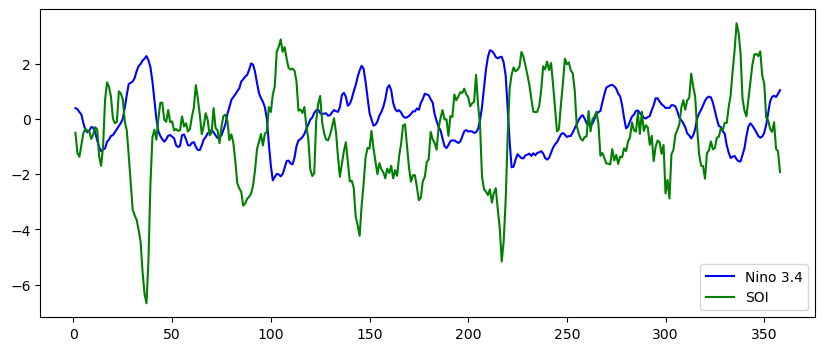

In [15]:
figure = plt.figure(figsize=(10,4))
plt.plot(nino34_mon_z_rm.values, 'b', label='Nino 3.4')
plt.plot(soi.values, 'g', label='SOI')
plt.legend()

## HW4 3b

In [21]:
# calculate the Pearson correlation coefficient between 
r_xy, p_xy = stats.pearsonr(nino34_mon_z_rm[1:-1], soi[1:-1])
print(r_xy,p_xy)

[[ 1.         -0.83535337]
 [-0.83535337  1.        ]]
-0.8353533479580424 0.0


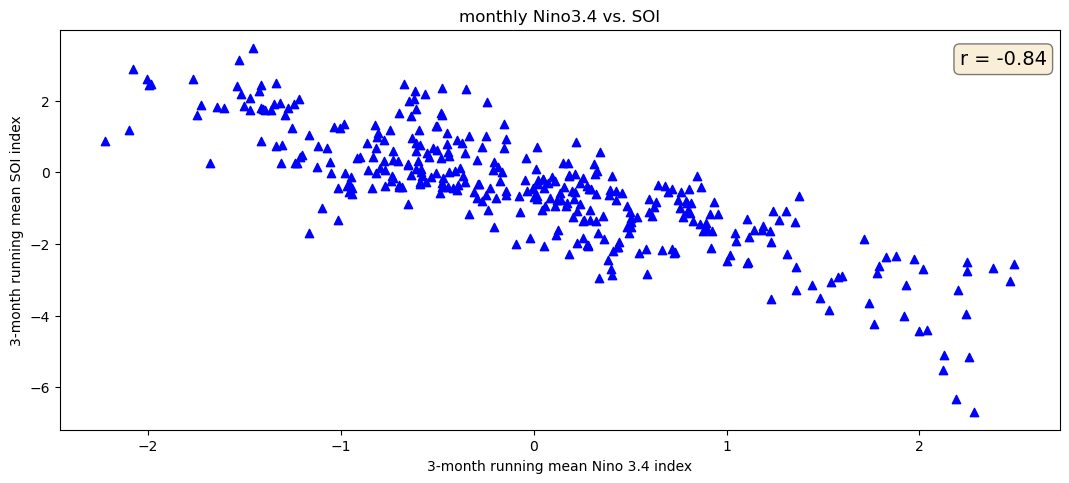

In [51]:
figure = plt.figure(figsize=(10,4))
ax = figure.add_axes([0, 0, 1, 1])

plt.scatter(nino34_mon_z_rm, soi, marker='^', c='b')
textstr = 'r = '+f"{r_xy:.2f}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.90, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel('3-month smoothing standardized Nino 3.4 index')
plt.ylabel('3-month smoothing standardized SOI index')
plt.title('monthly Nino3.4 vs. SOI')

plt.show()